In [ ]:
import numpy as np
from astropy.table import Table as t
import os

from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 360
matplotlib.rcParams['text.usetex'] = True
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

### Data

In [3]:
base_dir = './data/edr/vac/edr/lss/v2.0/LSScats/clustering/'
dat = f'{base_dir}ELG_N_clustering.dat.fits'
rand = f'{base_dir}ELG_N_0_clustering.ran.fits'

In [4]:
data = t.read(dat)
rand_data = t.read(rand)

### Spherical to Cartesian

$$x = d_c \cos{(\delta)} \cos{(\alpha)}$$
$$y = d_c \cos{(\delta)} \sin{(\alpha)}$$
$$z = d_c \sin{(\delta)}$$

In [86]:
def spherical_to_cartesian(ra, dec, z):
    d_z = cosmo.comoving_distance(z).to(u.Mpc).value  #z to comoving dist in Mpc
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    x = d_z * np.cos(dec_rad) * np.cos(ra_rad)
    y = d_z * np.cos(dec_rad) * np.sin(ra_rad)
    z = d_z * np.sin(dec_rad)

    return (x, y, z)

In [87]:
rosette = 3
rosette_dat = data[data['ROSETTE_NUMBER'] == rosette]
rosette_rand = rand_data[rand_data['ROSETTE_NUMBER'] == rosette]

In [88]:
data_cart = spherical_to_cartesian(rosette_dat['RA'], rosette_dat['DEC'], rosette_dat['Z'])
rand_cart = spherical_to_cartesian(rosette_rand['RA'], rosette_rand['DEC'], rosette_rand['Z'])

In [89]:
x_data, y_data, z_data = data_cart
x_rand, y_rand, z_rand = rand_cart

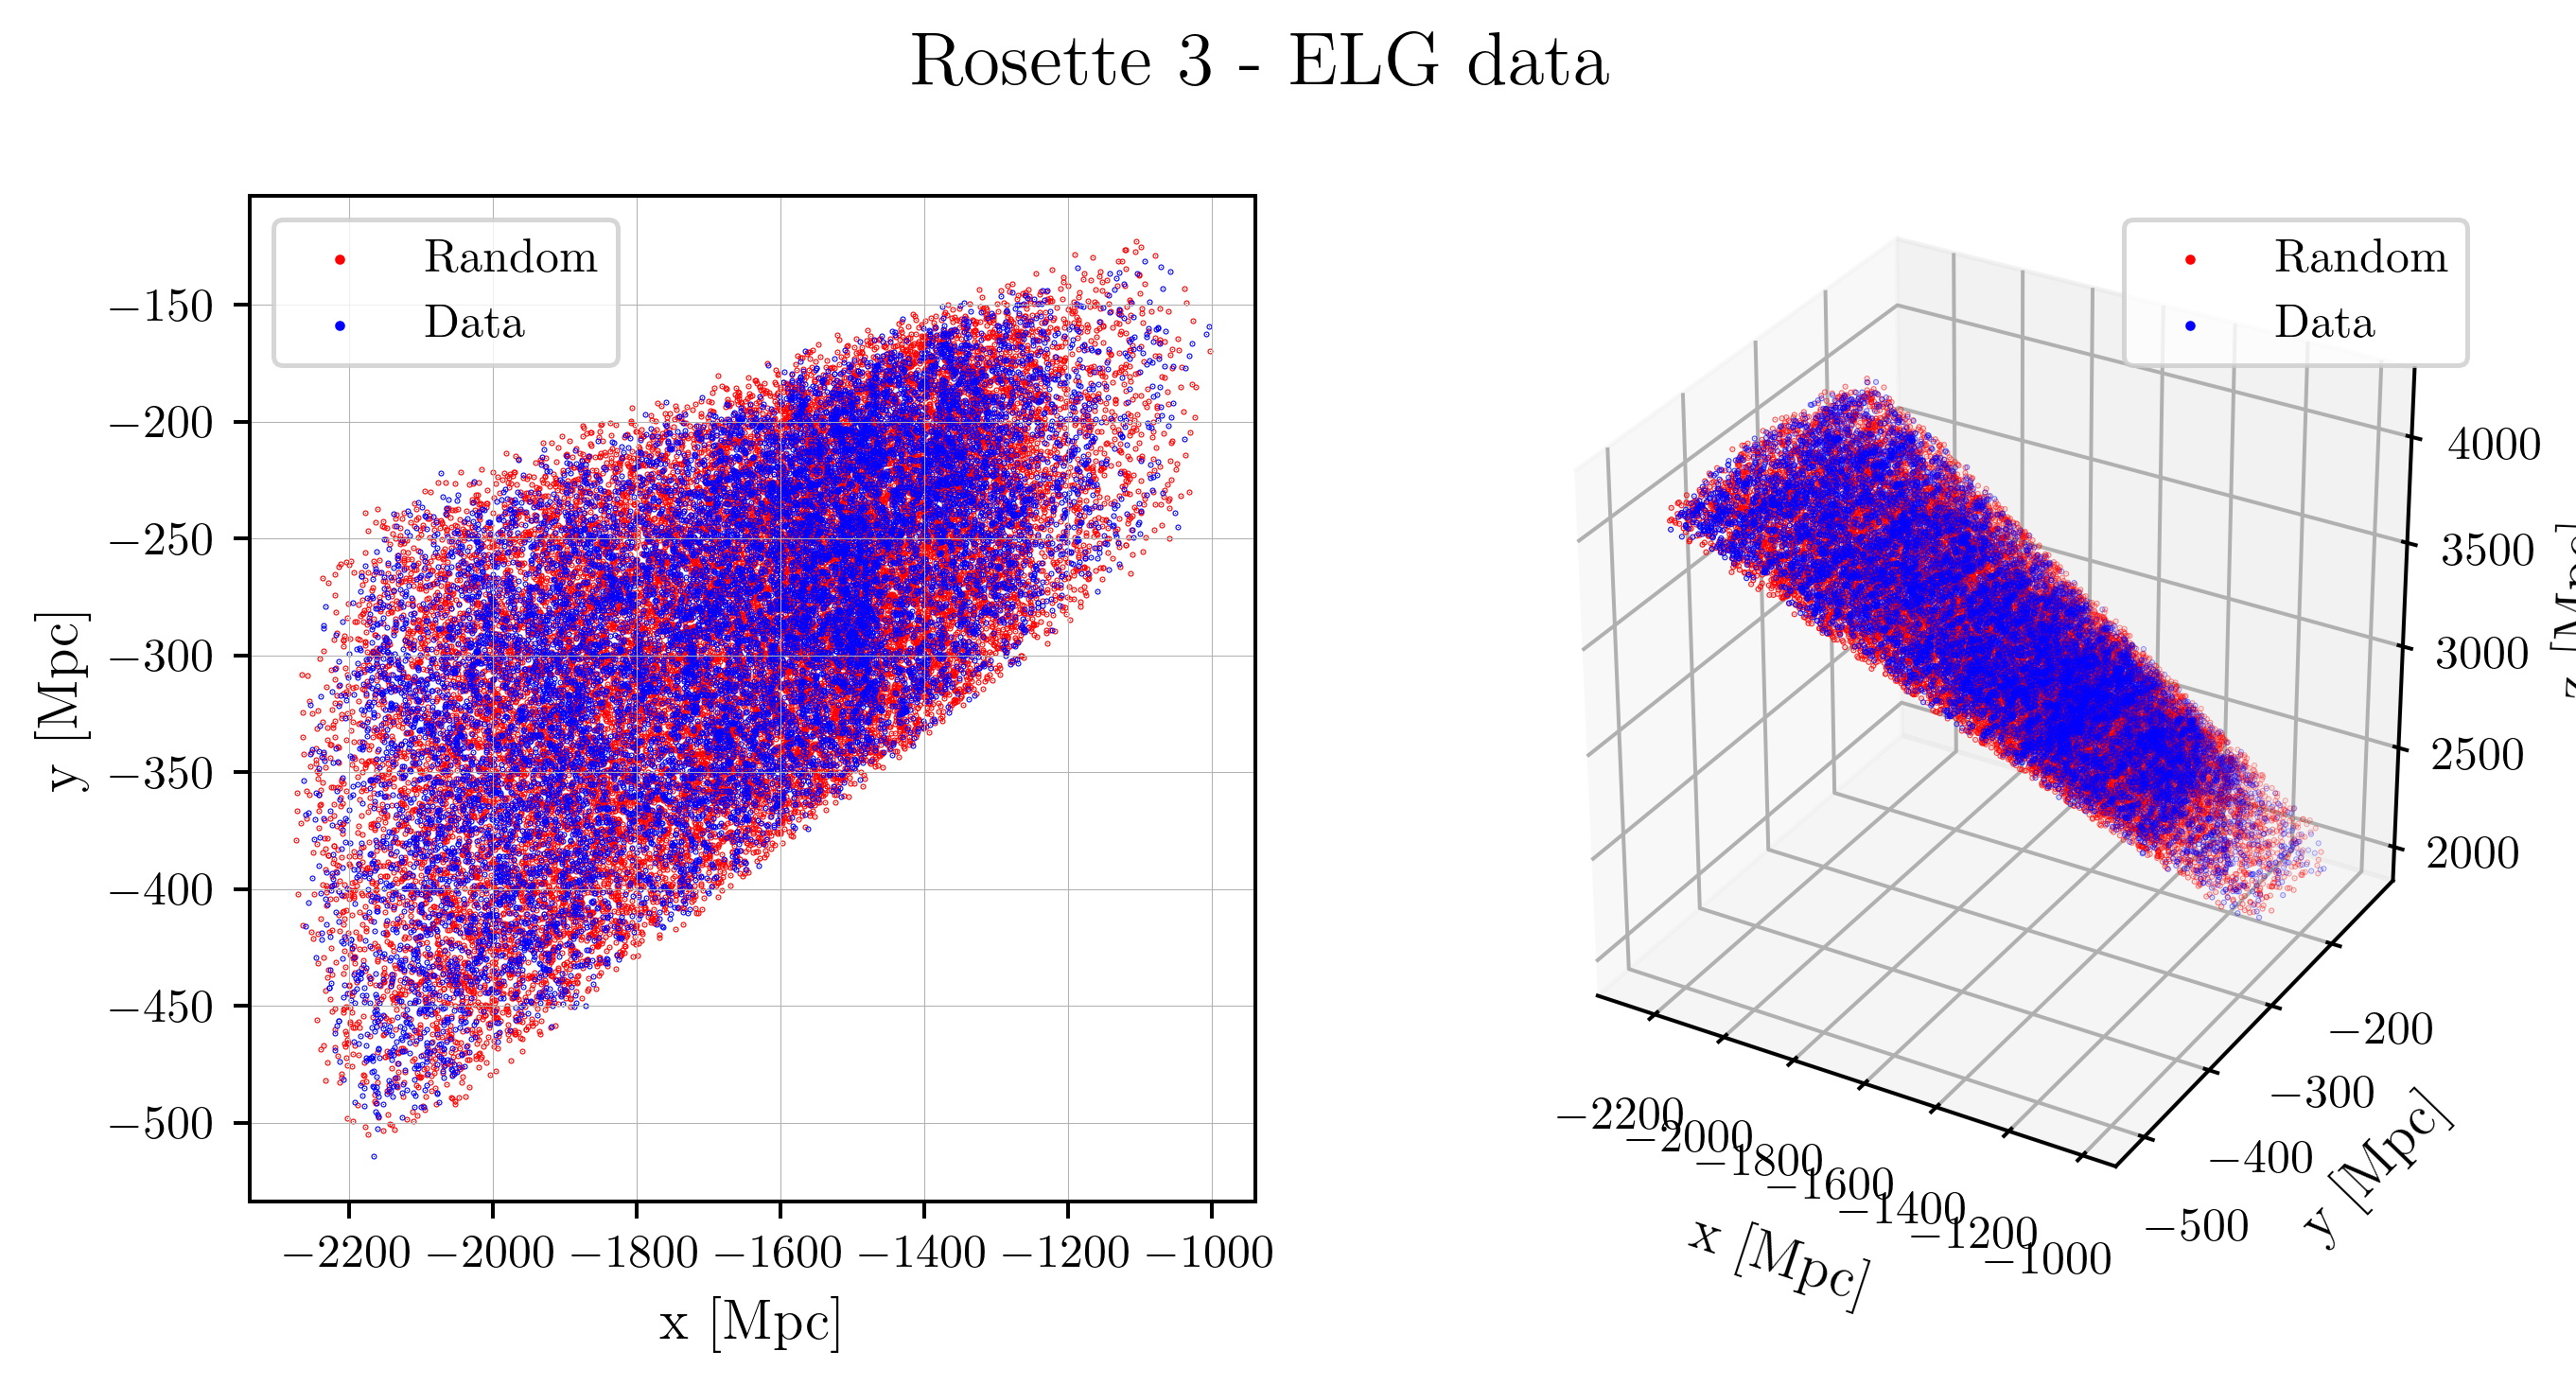

In [90]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1,2,1)
ax1.grid(linewidth=0.2)
ax1.scatter(x_rand, y_rand, s=0.05, c='r', label='Random')
ax1.scatter(x_data, y_data, s=0.05, c='b', label='Data')
ax1.set_xlabel('x [Mpc]')
ax1.set_ylabel('y [Mpc]')
ax1.legend(markerscale=5)
ax1.set_box_aspect(1)

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.grid(linewidth=0.2)
ax2.scatter(x_rand, y_rand, z_rand, c='r', s=0.05, label='Random')
ax2.scatter(x_data, y_data, z_data, c='b', s=0.05, label='Data')
ax2.set_xlabel('x [Mpc]')
ax2.set_ylabel('y [Mpc]')
ax2.set_zlabel('z [Mpc]')
ax2.legend(markerscale=5)

ax2.set_box_aspect((1,1,1))
plt.suptitle(f'Rosette {rosette} - ELG data', fontsize=16)

# ax.set_box_aspect((1,1,1))
# ax.view_init(elev=0, azim=30)
plt.tight_layout()
plt.show()

#### Save data for all rosettes

North

In [99]:
base_dir = './data/edr/vac/edr/lss/v2.0/LSScats/clustering/'
dat = f'{base_dir}ELG_N_clustering.dat.fits'
rand = f'{base_dir}ELG_N_0_clustering.ran.fits'

data = t.read(dat)
rand_data = t.read(rand)
rosette_ids = np.unique(data['ROSETTE_NUMBER'])

In [100]:
out_dir = './data/coord/'
os.makedirs(out_dir, exist_ok=True)

In [102]:
for rosette in rosette_ids:
    rosette_dat = data[data['ROSETTE_NUMBER'] == rosette]
    rosette_rand = rand_data[rand_data['ROSETTE_NUMBER'] == rosette]
    target_id = rosette_dat['TARGETID'][0]

    data_cart = spherical_to_cartesian(rosette_dat['RA'], rosette_dat['DEC'], rosette_dat['Z'])
    rand_cart = spherical_to_cartesian(rosette_rand['RA'], rosette_rand['DEC'], rosette_rand['Z'])

    x_data, y_data, z_data = data_cart
    x_rand, y_rand, z_rand = rand_cart

    tab_data = t([rosette_dat['TARGETID'], x_data, y_data, z_data],
        names=('TARGETID','X','Y','Z'))
    tab_data.write(f'{out_dir}ELG_{rosette}_clustering_data.ecsv', overwrite=True)

    tab_rand = t([rosette_rand['TARGETID'], x_rand, y_rand, z_rand],
        names=('TARGETID','X','Y','Z'))
    tab_rand.write(f'{out_dir}ELG_{rosette}_clustering_rand.ecsv', overwrite=True)


South

In [103]:
dat = f'{base_dir}ELG_S_clustering.dat.fits'
rand = f'{base_dir}ELG_S_0_clustering.ran.fits'

data = t.read(dat)
rand_data = t.read(rand)
rosette_ids = np.unique(data['ROSETTE_NUMBER'])

In [104]:
for rosette in rosette_ids:
    rosette_dat = data[data['ROSETTE_NUMBER'] == rosette]
    rosette_rand = rand_data[rand_data['ROSETTE_NUMBER'] == rosette]
    target_id = rosette_dat['TARGETID'][0]

    data_cart = spherical_to_cartesian(rosette_dat['RA'], rosette_dat['DEC'], rosette_dat['Z'])
    rand_cart = spherical_to_cartesian(rosette_rand['RA'], rosette_rand['DEC'], rosette_rand['Z'])

    x_data, y_data, z_data = data_cart
    x_rand, y_rand, z_rand = rand_cart

    tab_data = t([rosette_dat['TARGETID'], x_data, y_data, z_data],
        names=('TARGETID','X','Y','Z'))
    tab_data.write(f'{out_dir}ELG_{rosette}_clustering_data.ecsv', overwrite=True)

    tab_rand = t([rosette_rand['TARGETID'], x_rand, y_rand, z_rand],
        names=('TARGETID','X','Y','Z'))
    tab_rand.write(f'{out_dir}ELG_{rosette}_clustering_rand.ecsv', overwrite=True)